In [ ]:
!nvidia-smi

Wed Jul 30 09:58:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
print({HOME})

{'/content'}


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PREtYuS13VXPKlpKYGKD")
project = rf.workspace("capstone-cra8x").project("citypersons-woqjq-ike0o-dtqfy")
version = project.version(1)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Citypersons-1 in yolov8:: 100%|██████████| 6962/6962 [00:02<00:00, 2635.31it/s]


## Custom Training

In [ ]:
# for saving training weights
from google.colab import drive
drive.mount('/content/drive')
import shutil

Mounted at /content/drive


In [ ]:
print(dataset.location)

/content/datasets/Citypersons-1


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 batch=16

/content
100% 21.5M/21.5M [00:00<00:00, 347MB/s]
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Citypersons-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2275.6±1388.3 MB/s, size: 155.1 KB)
val: Scanning /content/datasets/Citypersons-1/valid/labels.cache... 342 images, 13 backgrounds, 0 corrupt: 100% 342/342 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:05<00:00,  3.89it/s]
                   all        342       3414      0.679      0.194      0.227      0.137
                  None        281       1202      0.333     0.0225     0.0295     0.0109
                ignore         42         49          1          0     0.0288     0.0188
                   ped        289       2163      0.703      0.559      0.622      0.382
Speed: 0.5ms preprocess, 5.1ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val
💡 Lear

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt source={dataset.location}/test/images save=true

/content
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/341 /content/datasets/Citypersons-1/test/images/aachen_000002_000019_leftImg8bit_png.rf.fb4b114d0b573cf6bb0a85130fb6a52c.jpg: 320x640 3 peds, 39.4ms
image 2/341 /content/datasets/Citypersons-1/test/images/aachen_000003_000019_leftImg8bit_png.rf.b7e8f36ea4590701f8e2c62981c36bd3.jpg: 320x640 1 ped, 10.5ms
image 3/341 /content/datasets/Citypersons-1/test/images/aachen_000004_000019_leftImg8bit_png.rf.c3e2a738d43c36b73f96cad7f7d8ed7d.jpg: 320x640 8 peds, 10.5ms
image 4/341 /content/datasets/Citypersons-1/test/images/aachen_000008_000019_leftImg8bit_png.rf.7ac575b86dd24472f21da0cd1aa2c39c.jpg: 320x640 2 Nones, 5 peds, 10.4ms
image 5/341 /content/datasets/Citypersons-1/test/images/aachen_000009_000019_leftImg8bit_png.rf.87da82fe21899a43dfa1710097f55e55.jpg: 320x640 5 peds, 10.4ms
image 6/341 /content/datasets/Ci

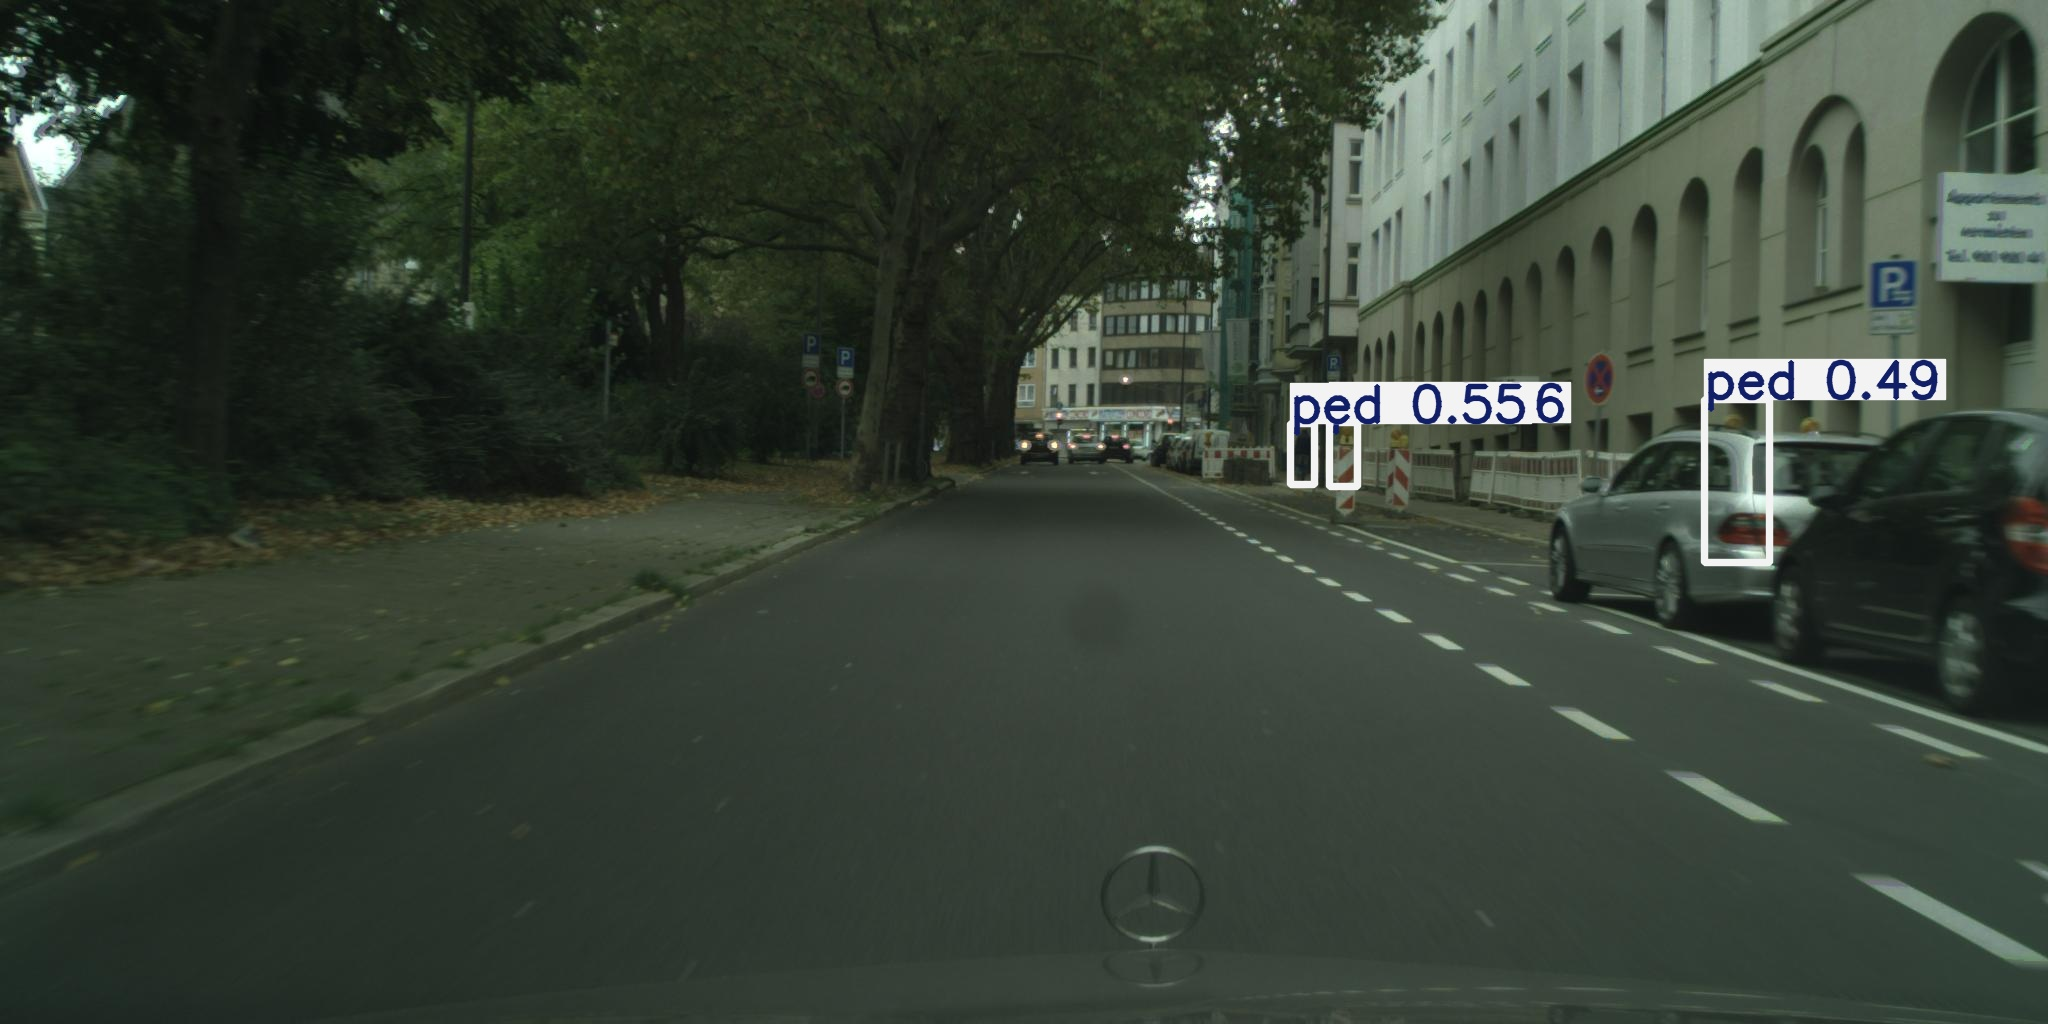

In [ ]:
Image(filename=f'/content/runs/detect/predict/aachen_000002_000019_leftImg8bit_png.rf.fb4b114d0b573cf6bb0a85130fb6a52c.jpg', width=600)

In [ ]:
#detect with new weights, uniform img

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt  source="/content/WhatsApp Image 2025-07-30 at 2.30.18 PM.jpeg" save=true

/content
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/WhatsApp Image 2025-07-30 at 2.30.18 PM.jpeg: 384x640 1 ped, 42.7ms
Speed: 2.4ms preprocess, 42.7ms inference, 172.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


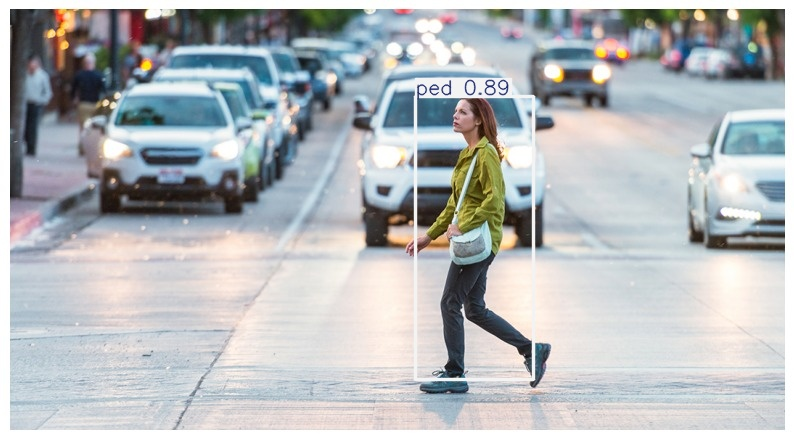

In [ ]:
Image(filename=f'/content/runs/detect/predict2/WhatsApp Image 2025-07-30 at 2.30.18 PM.jpg', width=600)

In [ ]:
#detect with pretrained weights, uniform img

%cd {HOME}
!yolo task=detect mode=predict model=yolov8s.pt  source="/content/WhatsApp Image 2025-07-30 at 2.30.18 PM.jpeg" save=true

/content
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

image 1/1 /content/WhatsApp Image 2025-07-30 at 2.30.18 PM.jpeg: 384x640 4 persons, 15 cars, 1 handbag, 44.8ms
Speed: 2.9ms preprocess, 44.8ms inference, 152.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


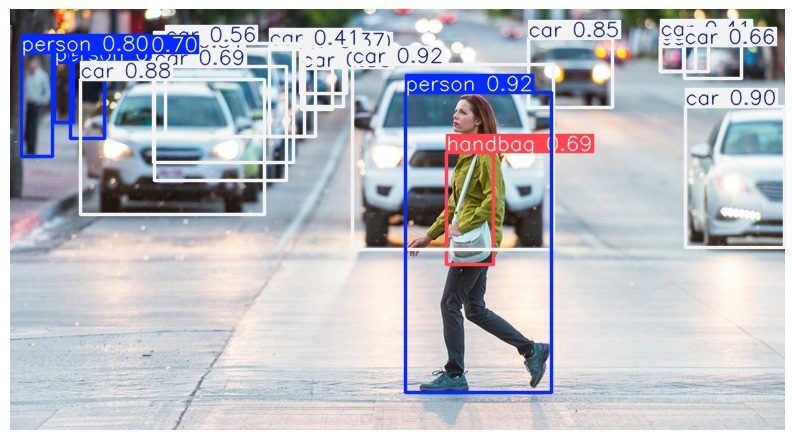

In [ ]:
Image(filename=f'/content/runs/detect/predict3/WhatsApp Image 2025-07-30 at 2.30.18 PM.jpg', width=600)

In [ ]:
#path that contains folder you want to copy
%cd /content/drive/MyDrive/MLPR_new_runs/yolov8
%cp -av /content/runs /content/drive/MyDrive/MLPR_new_runs/yolov8

/content/drive/MyDrive/MLPR_new_runs/yolov8
'/content/runs' -> '/content/drive/MyDrive/MLPR_new_runs/yolov8/runs'
'/content/runs/detect' -> '/content/drive/MyDrive/MLPR_new_runs/yolov8/runs/detect'
'/content/runs/detect/train' -> '/content/drive/MyDrive/MLPR_new_runs/yolov8/runs/detect/train'
'/content/runs/detect/train/weights' -> '/content/drive/MyDrive/MLPR_new_runs/yolov8/runs/detect/train/weights'
'/content/runs/detect/train/weights/last.pt' -> '/content/drive/MyDrive/MLPR_new_runs/yolov8/runs/detect/train/weights/last.pt'
'/content/runs/detect/train/weights/best.pt' -> '/content/drive/MyDrive/MLPR_new_runs/yolov8/runs/detect/train/weights/best.pt'
'/content/runs/detect/train/args.yaml' -> '/content/drive/MyDrive/MLPR_new_runs/yolov8/runs/detect/train/args.yaml'
'/content/runs/detect/train/labels_correlogram.jpg' -> '/content/drive/MyDrive/MLPR_new_runs/yolov8/runs/detect/train/labels_correlogram.jpg'
'/content/runs/detect/train/labels.jpg' -> '/content/drive/MyDrive/MLPR_new_runs

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

##Dataset

https://universe.roboflow.com/citypersons-conversion/citypersons-woqjq